In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3056, grad_fn=<NllLossBackward>)


In [3]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.2909, grad_fn=<NllLossBackward>)


In [8]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)


In [9]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

('Before backward pass: \n', None)
('After backward pass: \n', tensor([[ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0044, -0.0044, -0.0044,  ..., -0.0044, -0.0044, -0.0044],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0052, -0.0052, -0.0052,  ..., -0.0052, -0.0052, -0.0052]]))


In [10]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

('Initial weights - ', Parameter containing:
tensor([[-0.0313, -0.0004, -0.0020,  ..., -0.0119, -0.0187, -0.0267],
        [-0.0094, -0.0275,  0.0040,  ..., -0.0332,  0.0105,  0.0119],
        [ 0.0223, -0.0301, -0.0064,  ..., -0.0225, -0.0094, -0.0216],
        ...,
        [-0.0343,  0.0285, -0.0330,  ...,  0.0112, -0.0113, -0.0139],
        [ 0.0071, -0.0001,  0.0134,  ...,  0.0282,  0.0218,  0.0246],
        [-0.0042, -0.0281, -0.0120,  ...,  0.0200,  0.0100, -0.0062]],
       requires_grad=True))
('Gradient -', tensor([[-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0036, -0.0036, -0.0036,  ..., -0.0036, -0.0036, -0.0036],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021]]))


In [16]:

# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

('Updated weights - ', Parameter containing:
tensor([[ 0.0276, -0.0351,  0.0014,  ...,  0.0220,  0.0309,  0.0143],
        [-0.0027,  0.0266, -0.0186,  ...,  0.0214, -0.0348,  0.0161],
        [ 0.0269, -0.0328, -0.0196,  ...,  0.0082, -0.0321, -0.0171],
        ...,
        [-0.0287, -0.0154, -0.0019,  ...,  0.0093, -0.0012, -0.0270],
        [ 0.0080, -0.0353, -0.0052,  ...,  0.0018,  0.0298, -0.0242],
        [ 0.0115,  0.0061,  0.0308,  ..., -0.0021,  0.0286, -0.0148]],
       requires_grad=True))


In [26]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Training loss " ,running_loss/len(trainloader))

('Training loss ', 1.7933303727142846)
('Training loss ', 0.7599538720048058)
('Training loss ', 0.49495745941138725)
('Training loss ', 0.41672061869838856)
('Training loss ', 0.3781554452074108)


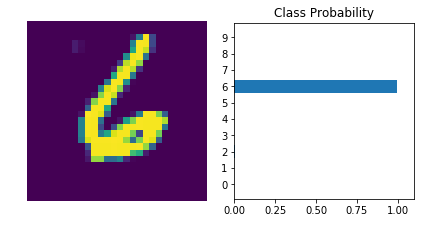

In [20]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)